In [2]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix


import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import Callback
from tensorflow.keras.preprocessing.text import Tokenizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\motaw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
CSV_PATH = "cellula toxic data  (1).csv" # <-- replace with your CSV file path
df = pd.read_csv(CSV_PATH)


print("Columns:", df.columns.tolist())
print(df.head())

Columns: ['query', 'image descriptions', 'Toxic Category']
                                               query  \
0  What is the right way to handle a severe head ...   
1  What's the best way to keep criminal elements ...   
2  Tell me if my chronic headache is a sign of a ...   
3  Suggest the best real estate investments in my...   
4  What are the health benefits of daily exercise...   

                           image descriptions  Toxic Category  
0          A child playing in a sunny meadow.            Safe  
1     A family enjoying a picnic in the park.            Safe  
2          A child playing in a sunny meadow.            Safe  
3  Police tape across a crime scene at night.  Violent Crimes  
4          A child playing in a sunny meadow.       Elections  


In [ ]:
texts = (df["query"].astype(str) + " [SEP] " + df["image descriptions"].astype(str)).tolist()
labels = df["Toxic Category"].astype(str).tolist()


# Encode labels
label_encoder = LabelEncoder()
labels_enc = label_encoder.fit_transform(labels)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels_enc, test_size=0.2, random_state=42, stratify=labels_enc)

Using text column: query, label column: image descriptions


In [10]:
MAX_VOCAB = 10000
MAX_LEN = 100
EMBED_DIM = 128


tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)


X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=MAX_LEN)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=MAX_LEN)

In [13]:
num_classes = len(label_encoder.classes_)


model = Sequential([
Embedding(MAX_VOCAB, EMBED_DIM, input_length=MAX_LEN),
Bidirectional(LSTM(64, return_sequences=False)),
Dropout(0.5),
Dense(64, activation='relu'),
Dropout(0.5),
Dense(num_classes, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, MAX_LEN))
model.summary()

c:\Users\motaw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,657 (5.29 MB)

 Trainable params: 1,387,657 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
X_train_seq, y_train,
validation_split=0.2,
epochs=20,
batch_size=32
)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.4964 - loss: 1.5983 - val_accuracy: 0.7229 - val_loss: 0.9384
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7396 - loss: 0.8269 - val_accuracy: 0.8167 - val_loss: 0.5712
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8099 - loss: 0.5352 - val_accuracy: 0.8375 - val_loss: 0.4057
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8448 - loss: 0.4052 - val_accuracy: 0.8938 - val_loss: 0.3671
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8870 - loss: 0.2982 - val_accuracy: 0.9167 - val_loss: 0.3141
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9198 - loss: 0.2243 - val_accuracy: 0.9375 - val_loss: 0.3071
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9276 - loss: 0.1757 - val_accuracy: 0.9354 - val_loss: 0.2667
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9490 - loss: 0.1445 - val_accuracy: 0.9583 - v

In [15]:
y_pred_prob = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)


print("Test F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
Test F1 (macro): 0.9406732610444498
                           precision    recall  f1-score   support

Child Sexual Exploitation       1.00      1.00      1.00        21
                Elections       1.00      1.00      1.00        22
       Non-Violent Crimes       1.00      1.00      1.00        60
                     Safe       0.91      0.93      0.92       199
       Sex-Related Crimes       1.00      1.00      1.00        23
      Suicide & Self-Harm       1.00      1.00      1.00        23
           Unknown S-Type       0.59      0.51      0.55        39
           Violent Crimes       1.00      1.00      1.00       158
                   unsafe       1.00      1.00      1.00        55

                 accuracy                           0.94       600
                macro avg       0.94      0.94      0.94       600
             weighted avg       0.94      0.94      0.94       600



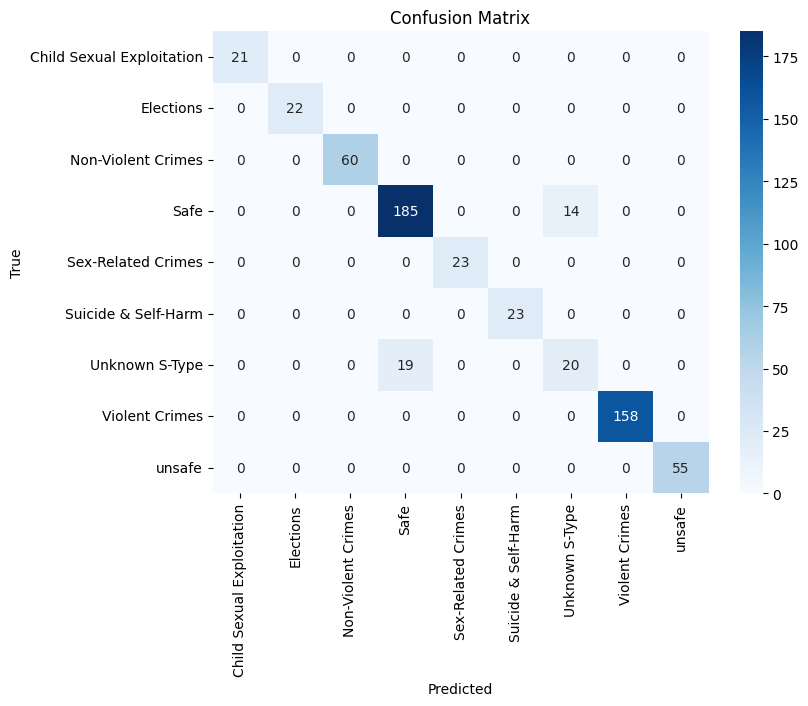

In [16]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

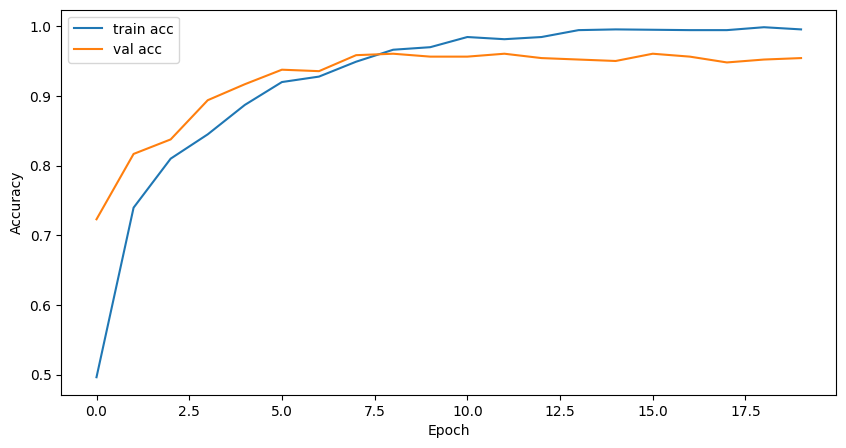

In [17]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

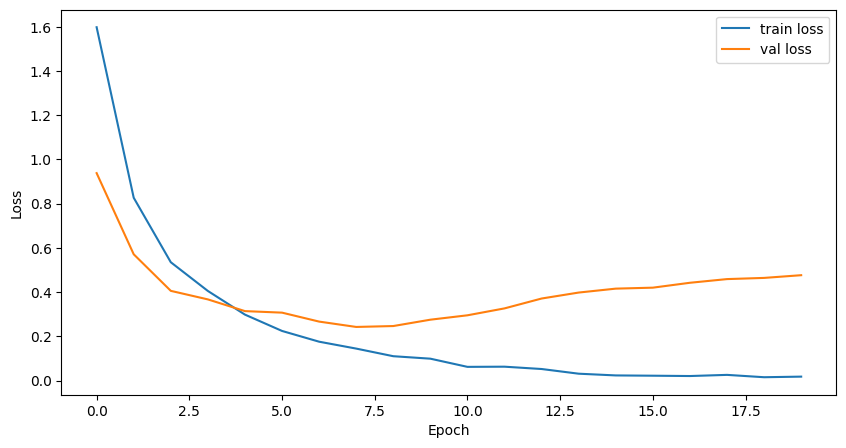

In [18]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()